In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import torchvision
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
import os
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import time
import os
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/LTU (1)/ADL_share/Project/data'

import torchvision.transforms as transforms

transforms_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transforms_val = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=path+'/train', transform=transforms_train)
val_dataset = ImageFolder(root=path+'/val', transform=transforms_val)
test_dataset = ImageFolder(root=path+'/test', transform=transforms_val)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

dataloaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}

# AlexNet 30 epochs

In [25]:
path_model = '/content/drive/MyDrive/LTU (1)/ADL_share/Project/models'

model_ft = models.alexnet(pretrained=True)
num_ftrs = model_ft.classifier[6].in_features

model_ft.classifier[6] = nn.Linear(num_ftrs,2)
input_size = 224

model_ft.load_state_dict(torch.load(path_model+'/alexnet_finetuned2-no_addon-30epochs.pth', map_location=torch.device('cpu')))

correct, total, f1 = 0, 0, 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        f1 += f1_score(labels.data, predicted)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {100 * correct / total} %')
print(f'f1: {f1 / len(test_loader)}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on test set: 92.78846153846153 %
f1: 0.9381210669672203


# AlexNet with deeper classifier 30 epochs

In [26]:
path_model = '/content/drive/MyDrive/LTU (1)/ADL_share/Project/models'

activation = nn.LeakyReLU(0.1)
dropout = nn.Dropout(0.5)

model_ft = models.alexnet(pretrained=True)
num_ftrs = model_ft.classifier[6].in_features

classifier_addon = nn.Sequential(
    nn.Linear(2048,1024),
    activation,
    dropout,
    nn.Linear(1024,512),
    activation,
    dropout,
    nn.Linear(512,256),
    activation,
    dropout,
    nn.Linear(256,2)
)

model_ft.classifier[6] = nn.Linear(num_ftrs,2048)
model_ft.classifier.append(classifier_addon)

input_size = 224

model_ft.load_state_dict(torch.load(path_model+'/alexnet_finetuned2-addon-30epochs.pth', map_location=torch.device('cpu')))

correct, total, f1 = 0, 0, 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        f1 += f1_score(labels.data, predicted)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {100 * correct / total} %')
print(f'f1: {f1 / len(test_loader)}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on test set: 92.62820512820512 %
f1: 0.9350577485192864


#ResNet 18 fine-tuned last layer 15 epochs

In [28]:
from sklearn.metrics import f1_score

path_model = '/content/drive/MyDrive/LTU (1)/ADL_share/Project/models'

model_ft = models.resnet18(pretrained=True)

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
input_size = 224

model_ft.load_state_dict(torch.load(path_model+'/resnet_finetuned.pth', map_location=torch.device('cpu')))

correct, total, f1 = 0, 0, 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        f1 += f1_score(labels.data, predicted)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {100 * correct / total} %')
print(f'f1: {f1 / len(test_loader)}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Accuracy on test set: 94.23076923076923 %
f1: 0.9504628562320866


In [21]:
print(len(test_loader))

78


<BarContainer object of 4 artists>

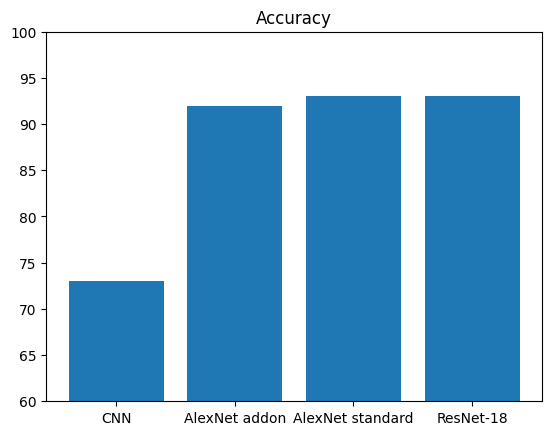

In [17]:
acc = [73, 92.6, 92.8, 94.2]
labels = ['CNN', 'AlexNet addon', 'AlexNet standard', 'ResNet-18']
ax = plt.gca()
ax.set_ylim([60, 100])
plt.title('Accuracy')

plt.bar(labels, acc)

<BarContainer object of 3 artists>

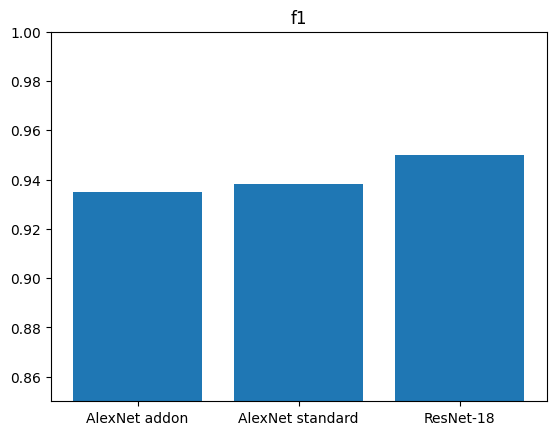

In [30]:
f1 = [0.935, 0.938, 0.950]
labels = ['AlexNet addon', 'AlexNet standard', 'ResNet-18']
ax = plt.gca()
ax.set_ylim([0.85, 1.0])
plt.title('f1')

plt.bar(labels , f1)